# Python 程式語言初級班工作坊

> Python 資料視覺化，東吳大學，2021-05-20

[數據交點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

## Matplotlib 快速入門

## 確認分析環境能夠使用這些套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 檢視這些套件的版本資訊

In [2]:
## Note that there are 2 underlines before and after __version__ attributes
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.18.4
1.1.5
3.2.1


## 簡介 Matplotlib 套件

> Matplotlib，Matlab Plotting Library 的簡稱，是在 Python 中將資料視覺化的第三方套件。

## pyplot 模組

> 隸屬於 Matplotlib 的繪圖工具，用類似 Matlab 的語法建立視覺化。

## 使用流程

- 將資料整理為 `ndarray` 或 `Series` 格式
- 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」
- 依照探索需求呼叫「軸物件」的作圖方法
- 依照設計需求添加「軸物件」的元素
- 呼叫 `plt.show()` 顯示圖形（或者 `plt.savefig()` 儲存圖形）

## 將 CSV 文字檔案讀入成為資料框

- 範例資料：COVID-19 時間序列
- 資料來源：<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series>

In [3]:
request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series = pd.read_csv(request_url)
type(time_series)

pandas.core.frame.DataFrame

In [4]:
time_series.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354


## 資料整理：轉置

In [5]:
id_cols = time_series.columns[:4]
time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
time_series_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


## 資料整理：轉換 `Date` 型別

In [6]:
date = pd.to_datetime(time_series_long['Date'])
time_series_long = time_series_long.drop('Date', axis=1)
time_series_long.insert(4, 'Date', date)
time_series_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  41280 non-null   object        
 1   Country/Region  132000 non-null  object        
 2   Lat             131040 non-null  float64       
 3   Long            131040 non-null  float64       
 4   Date            132000 non-null  datetime64[ns]
 5   Confirmed       132000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.0+ MB


## 繪製兩個視覺化

1. 台灣累計確診人數趨勢圖；
2. 台灣每日新增確診人數長條圖。

## 繪製台灣累計確診人數趨勢圖

## 將資料整理為 `ndarray` 或 `Series` 格式

In [7]:
tw = time_series_long[time_series_long['Country/Region'] == 'Taiwan*']
x = tw['Date'].values
y = tw['Confirmed'].values

## 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」

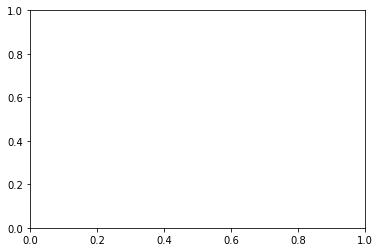

In [8]:
fig = plt.figure()
ax = plt.axes()

## 依照探索需求呼叫「軸物件」的作圖方法

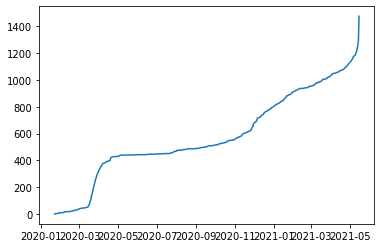

In [9]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

## 依照設計需求添加「軸物件」的元素

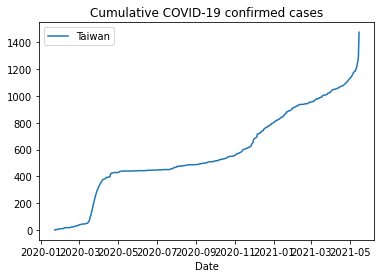

In [10]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="Taiwan")
ax.set_xlabel('Date')
ax.set_title('Cumulative COVID-19 confirmed cases')
ax.legend(loc='upper left')

## 呼叫 plt.show() 顯示圖形

或者 `plt.savefig()` 儲存圖形。

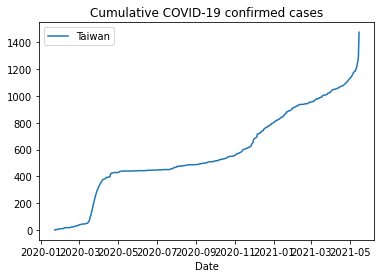

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="Taiwan")
ax.set_xlabel('Date')
ax.set_title('Cumulative COVID-19 confirmed cases')
ax.legend(loc='upper left')
plt.show() # plt.savefig('tw_covid19_time_series.png')

## 繪製台灣每日新增確診人數長條圖

## 將資料整理為 `ndarray` 或 `Series` 格式

In [12]:
daily_increase = np.diff(tw['Confirmed'].values, n=1)

## 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」

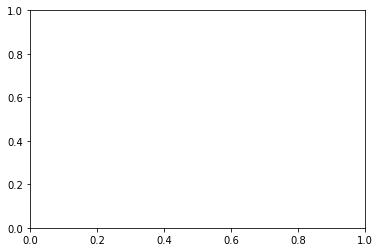

In [13]:
fig = plt.figure()
ax = plt.axes()

## 依照探索需求呼叫「軸物件」的作圖方法

<BarContainer object of 479 artists>

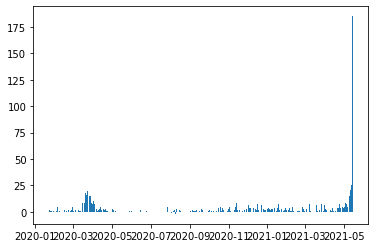

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase)

## 依照設計需求添加「軸物件」的元素

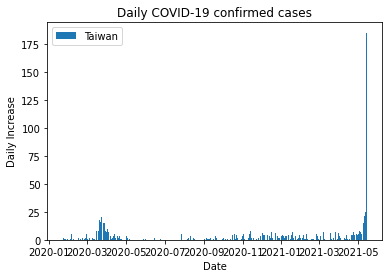

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='Taiwan')
ax.set_title('Daily COVID-19 confirmed cases')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Increase')
ax.set_ylim(0, None)
ax.legend()

## 呼叫 plt.show() 顯示圖形

或者 `plt.savefig()` 儲存圖形。

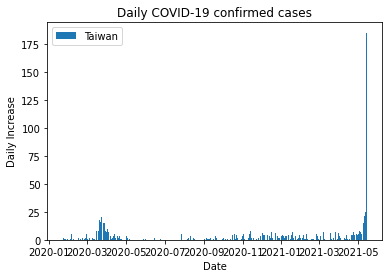

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='Taiwan')
ax.set_title('Daily COVID-19 confirmed cases')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Increase')
ax.set_ylim(0, None)
ax.legend()
plt.show() # plt.savefig('tw_covid19_daily_increase.png')

## 調整中文字型無法顯示的問題

Matplotlib 預設使用的字體不支援中文、日文、韓文等非歐美語系文字。

/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22686 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30906 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kuoyaojen/pyda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: 

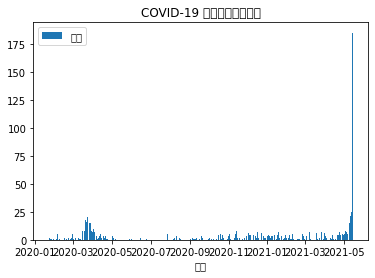

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='台灣')
ax.set_title('COVID-19 每日新增確診人數')
ax.set_xlabel('日期')
ax.set_ylim(0, None)
ax.legend()
plt.show() # plt.savefig('tw_covid19_daily_increase.png')

## 指定可以支援中文字體的字型

使用 `FontProperties` 函數。

In [18]:
from matplotlib.font_manager import FontProperties

my_font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc") # 可以支援中文字體的字型

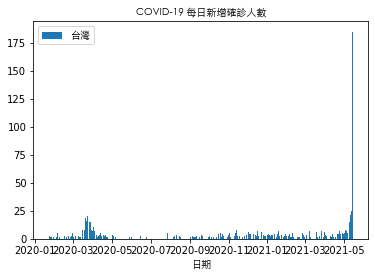

In [19]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='台灣')
ax.set_title('COVID-19 每日新增確診人數', fontproperties=my_font)
ax.set_xlabel('日期', fontproperties=my_font)
ax.set_ylim(0, None)
ax.legend(prop=my_font)
plt.show() # plt.savefig('tw_covid19_daily_increase.png')

In [20]:
from matplotlib.font_manager import FontProperties

def plot_with_specific_font(fonts_file_path, x, y):
    my_font = FontProperties(fname=fonts_file_path) # 可以支援中文字體的字型
    fig = plt.figure()
    ax = plt.axes()
    ax.bar(x[1:], y, label='台灣')
    ax.set_title('COVID-19 每日新增確診人數', fontproperties=my_font)
    ax.set_xlabel('日期', fontproperties=my_font)
    ax.set_ylim(0, None)
    ax.legend(prop=my_font)
    plt.show()

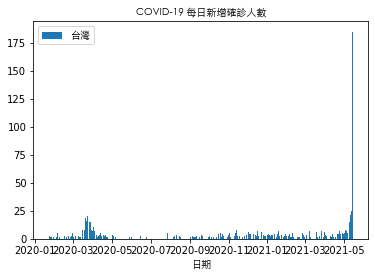

In [21]:
plot_with_specific_font("/System/Library/Fonts/STHeiti Light.ttc", x, daily_increase)